# Artificial Inteligence

## kelompok 2

- Alfianri Manihuruk
- Puti 
- Cornel silaen
- Nawa
- Anenesa

### Deteksi Gizi Buruk Pada Anak Menggunakan Fuzzy Logic

Variabel Yang Digunakan
- Usia
- Tinggi
- Berat

In [4]:
#library yang digunakan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skfuzzy as fuzz

# Fungsi Keanggotaan

In [5]:
def rangesub (low, high, step):
    subjektif = np.arange(low, high, step)
    return subjektif

def Algoritmafuz(rule, range_sub, title):
    lo = fuzz.trapmf(range_sub, rule[0])
    mi = fuzz.trapmf(range_sub, rule[1])
    hi = fuzz.trapmf(range_sub, rule[2])
    
    fig, ax =plt.subplots(nrows=1, figsize=(6,3))
    ax.plot(range_sub, lo, 'b', linewidth = 1.5, label= 'ringan')
    ax.plot(range_sub, mi, 'g', linewidth = 1.5, label= 'sedang')
    ax.plot(range_sub, hi, 'r', linewidth = 1.5, label= 'berat')
    
    ax.set_title(title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()
    plt.show()
    
    return lo, mi, hi

def Algoritmafuz2(rule, range_sub, title):
    lo = fuzz.trapmf(range_sub, rule[0])
    hi = fuzz.trapmf(range_sub, rule[1])
   
    fig, ax =plt.subplots(nrows=1, figsize=(6,3))
    ax.plot(range_sub, lo, 'y', linewidth = 1.5, label= 'pendek')
    ax.plot(range_sub, hi, 'b', linewidth = 1.5, label= 'tinggi')
    
    ax.set_title(title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()
    plt.show()
    
    return lo, hi

def Algoritmafuz3(rule, range_sub, title):
    lo = fuzz.trapmf(range_sub, rule[0])
    hi = fuzz.trapmf(range_sub, rule[1])
   
    fig, ax =plt.subplots(nrows=1, figsize=(6,3))
    ax.plot(range_sub, lo, 'y', linewidth = 1.5, label= 'fase 1')
    ax.plot(range_sub, hi, 'b', linewidth = 1.5, label= 'fase 2')
    
    ax.set_title(title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()
    plt.show()
    
    return lo, hi

# Fungsi Keanggotaan

In [6]:
## Fungsi Keanggotaan
#1. Usia
xusia = rangesub(0, 24, 0.1)
rusia= np.array([
    [0, 6, 8, 12],
    [13, 17, 20, 24]    
])

#2. Berat Badan
xberat = rangesub(0, 25, 0.1)
rberat = np.array([
    [0, 7, 9, 13],
    [13, 15, 17, 19],
    [19, 21, 23, 25]
])

#3. Tinggi Badan
xtinggi = rangesub(50, 100, 0.1)
rtinggi = np.array([
    [50, 75, 80, 90],
    [80, 90, 95, 100]
])


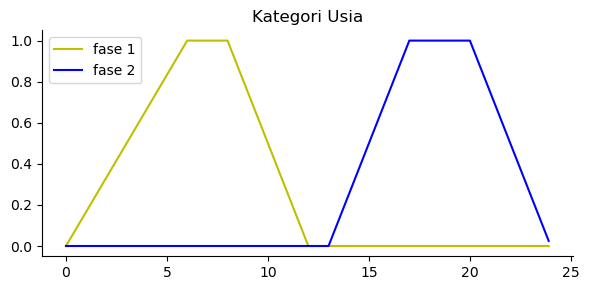

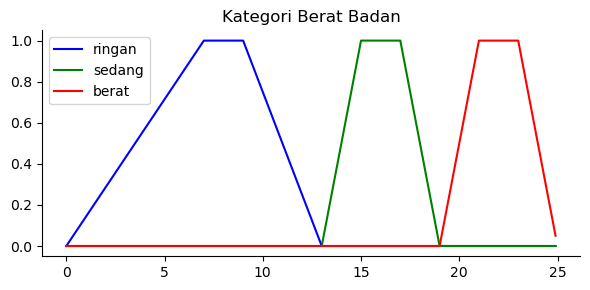

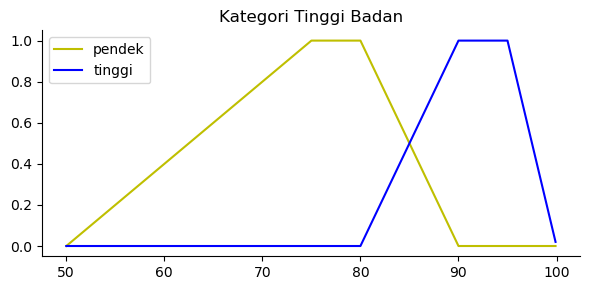

In [7]:
lo_usia,hi_usia = Algoritmafuz3(rusia, xusia, 'Kategori Usia')
lo_berat, mi_berat, hi_berat = Algoritmafuz(rberat, xberat, 'Kategori Berat Badan')
lo_tinggi, hi_tinggi = Algoritmafuz2(rtinggi, xtinggi, 'Kategori Tinggi Badan')

## Fungsi Status Keanggotaan

In [8]:
def FungKeanggotaan (range_sub, lo, mi, hi, berat):
    lo = fuzz.interp_membership(range_sub, lo, berat)
    mi = fuzz.interp_membership(range_sub, mi, berat)  
    hi = fuzz.interp_membership(range_sub, hi, berat) 

    return lo, mi, hi

def FungKeanggotaan2 (range_sub, lo, hi, nilai):
    lo = fuzz.interp_membership(range_sub, lo, nilai) 
    hi = fuzz.interp_membership(range_sub, hi, nilai) 

    return lo, hi

## Fungsi Status Keanggotaan

In [9]:
def Status(keanggotaan):
    status = ""
    if keanggotaan[0] > keanggotaan[1] and keanggotaan[0] > keanggotaan[2]:
        status = "ringan"
    elif keanggotaan[1] > keanggotaan[0] and keanggotaan[1] > keanggotaan[2]:
        status = "sedang"
    elif keanggotaan[2] > keanggotaan[0] and keanggotaan[2] > keanggotaan[1]:
        status = "berat"

    return status

def Status2(keanggotaan):
    status = ""
    if keanggotaan[0] > keanggotaan[1]:
        status = "fase 1"
    elif keanggotaan[1] > keanggotaan[0]:
        status = "fase 2"
    return status

def Status3(keanggotaan):
    status = ""
    if keanggotaan[0] > keanggotaan[1]:
        status = "tinggi"
    elif keanggotaan[1] > keanggotaan[0]:
        status = "pendek"
    return status


### 1. fungsi keanggotaan berat badan

In [10]:
berat = 5
berat_badan= FungKeanggotaan(xberat, lo_berat, mi_berat, hi_berat, berat)
print("Berat badan :", berat_badan)

Berat badan : (0.7142857142857143, 0.0, 0.0)


### 2. fungsi keanggotaan tinggi badan

In [16]:
tinggi = 99
tinggi_badan= FungKeanggotaan2(xtinggi, lo_tinggi, hi_tinggi, tinggi)
print("Tinggi badan :", tinggi_badan)

Tinggi badan : (0.0, 0.2)


### 3. fungsi keanggotaan usia 

In [17]:
usia = 23
usia_anak= FungKeanggotaan2(xusia, lo_usia, hi_usia, usia)
print("Usia anak :", usia_anak)

Usia anak : (0.0, 0.25)


# Hasil Keanggotaan

In [13]:
status_tinggi = Status3(tinggi_badan)
status_usia   = Status2(usia_anak)
status_berat  = Status(berat_badan)

print("Status Tinggi Badan      :", status_tinggi)
print("Status Usia Anak         :", status_usia)
print("Status Berat Badan       :", status_berat)

Status Tinggi Badan      : tinggi
Status Usia Anak         : fase 2
Status Berat Badan       : ringan


# Fuzzy Rule Base

- berat badan  (ringan, sedang, berat)
- tinggi badan (pendek, tinggi)
- usia anak    (fase 1, fase 2)

In [18]:
def rulebase(berat, tinggi, usia):
    anak = ''
    
    # bagian 1
    if berat == 'ringan' and tinggi == 'pendek' and usia == 'fase 1':
        anak= 'Status Gizi Buruk'
    elif berat == 'ringan' and tinggi == 'pendek' and usia == 'fase 2':
        anak= 'Status Gizi Buruk'
        
    elif berat == 'ringan' and tinggi == 'tinggi' and usia == 'fase 1':
        anak= 'Status Gizi Normal'
    elif berat == 'ringan' and tinggi == 'tinggi' and usia == 'fase 2':
        anak= 'Status Gizi Normal'
        
    # bagian 2      
    elif berat == 'sedang' and tinggi == 'pendek' and usia == 'fase 1':
        anak= 'Status Gizi Normal'
    elif berat == 'sedang' and tinggi == 'pendek' and usia == 'fase 2':
        anak= 'Status Gizi Normal'    
    elif berat == 'sedang' and tinggi == 'tinggi' and usia == 'fase 1':
        anak= 'Status Gizi Obesitas'
    elif berat == 'sedang' and tinggi == 'tinggi' and usia == 'fase 2':
        anak= 'Status Gizi Lebih'  
    
    # bagian 3    
    elif berat == 'berat' and tinggi == 'pendek' and usia == 'fase 1':
        anak= 'Status Gizi Obesitas'
    elif berat == 'berat' and tinggi == 'pendek' and usia == 'fase 2':
        anak= 'Status Gizi Obesitas'
        
    elif berat == 'berat' and tinggi == 'tinggi' and usia == 'fase 1':
        anak= 'Status Gizi Obesitas'
    elif berat == 'berat' and tinggi == 'tinggi' and usia == 'fase 2':
        anak= 'Status Gizi Obesitas'
    
    # bagian 4
        
    elif berat == 'ringan' and tinggi == 'pendek' and usia == 'fase 2':
        anak= 'Status Gizi Buruk'
    elif berat == 'ringan' and tinggi == 'pendek' and usia == 'fase 1':
        anak= 'Status Gizi Buruk'
        
    elif berat == 'ringan' and tinggi == 'pendek' and usia == 'fase 2':
        anak= 'Status Gizi Buruk'
    elif berat == 'ringan' and tinggi == 'tinggi' and usia == 'fase 1':
        anak = 'Status Gizi Normal'
        
    else:
        anak= " data yang dimasukkan tidak valid"
        
    return anak

# Hasil Akhir 

In [19]:
rulebase(status_berat, status_tinggi, status_usia)

'Status Gizi Normal'